In [1]:
import numpy as np
import pymc3

/Users/stephenhky/anaconda/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [13]:
%matplotlib inline

In [2]:
# radioactive element
# parameter
nbatoms = 10000
tau = 234.
atomstates = np.array([1]*nbatoms, dtype=np.int32)   # 1: original; 0: decayed

T = 500
N = [np.sum(atomstates)]*T
tseries = np.arange(T)
for t in range(1, T):
    for i in range(nbatoms):
        if atomstates[i] == 1:
            if np.random.uniform() < 1/tau:
                atomstates[i] = 0
    N[t] = np.sum(atomstates)            

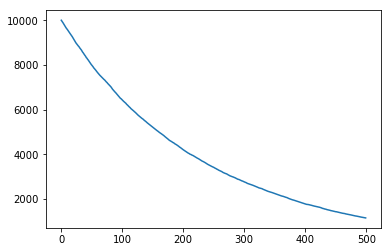

In [14]:
from matplotlib import pyplot as plt

plt.plot(tseries, N)

In [35]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(np.array([tseries]).T, np.log(np.array([N]).T))

print(linreg.coef_)
print(linreg.intercept_)

[[-0.00430132]]
[9.20578742]


In [39]:
import theano.tensor as T
from pymc3 import Model, Exponential, Gamma, Binomial, Normal


# Defining the model
radioactive_model = Model()

with radioactive_model:
    lamb = Gamma('lamb', alpha=0.6*nbatoms, beta=nbatoms)
    logp = -lamb*tseries
    pred_N = Binomial('pred_N', n=nbatoms, p=T.exp(logp), observed=N)

In [37]:
from pymc3 import find_MAP

map_estimate = find_MAP(model=radioactive_model)

print(map_estimate)

logp = -26,048, ||grad|| = 81.36: 100%|██████████| 14/14 [00:00<00:00, 610.74it/s]  

{'lamb': array(0.00433504), 'lamb_log__': array(-5.44102505)}


In [40]:
from pymc3 import find_MAP, NUTS, sample
from scipy.optimize import fmin_powell

with radioactive_model:
    start = find_MAP(fmin=fmin_powell)
    
    step = NUTS(scaling=start)
    
    trace = sample(2000, step, start=start)

print(trace)

logp = -inf:   1%|          | 38/5000 [00:00<00:07, 632.27it/s] 


Optimization terminated successfully.
         Current function value: -10000000000000000159028911097599180468360808563945281389781327557747838772170381060813469985856815104.000000
         Iterations: 2
         Function evaluations: 38


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [lamb]


JoblibSamplingError: JoblibSamplingError
___________________________________________________________________________
...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    169     pkg_name = mod_name.rpartition('.')[0]
    170     main_globals = sys.modules["__main__"].__dict__
    171     if alter_argv:
    172         sys.argv[0] = fname
    173     return _run_code(code, main_globals, None,
--> 174                      "__main__", fname, loader, pkg_name)
        fname = '/Users/stephenhky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = 'ipykernel'
    175 
    176 def run_module(mod_name, init_globals=None,
    177                run_name=None, alter_sys=False):
    178     """Execute a module's code without importing it

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/runpy.py in _run_code(code=<code object <module> at 0x1094ea530, file "/Use...2.7/site-packages/ipykernel/__main__.py", line 1>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/Users/stephenhky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/Users/steph...python2.7/site-packages/ipykernel/kernelapp.pyc'>}, init_globals=None, mod_name='__main__', mod_fname='/Users/stephenhky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='ipykernel')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 0x1094ea530, file "/Use...2.7/site-packages/ipykernel/__main__.py", line 1>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/Users/stephenhky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/Users/steph...python2.7/site-packages/ipykernel/kernelapp.pyc'>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py in <module>()
      1 if __name__ == '__main__':
      2     from ipykernel import kernelapp as app
----> 3     app.launch_new_instance()

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    469             return self.subapp.start()
    470         if self.poller is not None:
    471             self.poller.start()
    472         self.kernel.start()
    473         try:
--> 474             ioloop.IOLoop.instance().start()
    475         except KeyboardInterrupt:
    476             pass
    477 
    478 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    882                 self._events.update(event_pairs)
    883                 while self._events:
    884                     fd, events = self._events.popitem()
    885                     try:
    886                         fd_obj, handler_func = self._handlers[fd]
--> 887                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    888                     except (OSError, IOError) as e:
    889                         if errno_from_exception(e) == errno.EPIPE:
    890                             # Happens when the client closes the connection
    891                             pass

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    271         if self.control_stream:
    272             self.control_stream.on_recv(self.dispatch_control, copy=False)
    273 
    274         def make_dispatcher(stream):
    275             def dispatcher(msg):
--> 276                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    277             return dispatcher
    278 
    279         for s in self.shell_streams:
    280             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'from pymc3 import find_MAP, NUTS, sample\nfrom... sample(2000, step, start=start)\n\nprint(trace)', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2019-01-21T11:25:52.396716', u'msg_id': u'061FB3D146AF4794AC2F46F016104D86', u'msg_type': u'execute_request', u'session': u'C1C16987FFE64B7BB0649CE19C385C23', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'061FB3D146AF4794AC2F46F016104D86', 'msg_type': u'execute_request', 'parent_header': {}})
    223             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    224         else:
    225             self.log.debug("%s: %s", msg_type, msg)
    226             self.pre_handler_hook()
    227             try:
--> 228                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['C1C16987FFE64B7BB0649CE19C385C23']
        msg = {'buffers': [], 'content': {u'allow_stdin': True, u'code': u'from pymc3 import find_MAP, NUTS, sample\nfrom... sample(2000, step, start=start)\n\nprint(trace)', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2019-01-21T11:25:52.396716', u'msg_id': u'061FB3D146AF4794AC2F46F016104D86', u'msg_type': u'execute_request', u'session': u'C1C16987FFE64B7BB0649CE19C385C23', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'061FB3D146AF4794AC2F46F016104D86', 'msg_type': u'execute_request', 'parent_header': {}}
    229             except Exception:
    230                 self.log.error("Exception in message handler:", exc_info=True)
    231             finally:
    232                 self.post_handler_hook()

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['C1C16987FFE64B7BB0649CE19C385C23'], parent={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'from pymc3 import find_MAP, NUTS, sample\nfrom... sample(2000, step, start=start)\n\nprint(trace)', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2019-01-21T11:25:52.396716', u'msg_id': u'061FB3D146AF4794AC2F46F016104D86', u'msg_type': u'execute_request', u'session': u'C1C16987FFE64B7BB0649CE19C385C23', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'061FB3D146AF4794AC2F46F016104D86', 'msg_type': u'execute_request', 'parent_header': {}})
    385         if not silent:
    386             self.execution_count += 1
    387             self._publish_execute_input(code, parent, self.execution_count)
    388 
    389         reply_content = self.do_execute(code, silent, store_history,
--> 390                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    391 
    392         # Flush output before sending the reply.
    393         sys.stdout.flush()
    394         sys.stderr.flush()

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u'from pymc3 import find_MAP, NUTS, sample\nfrom... sample(2000, step, start=start)\n\nprint(trace)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u'from pymc3 import find_MAP, NUTS, sample\nfrom... sample(2000, step, start=start)\n\nprint(trace)'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=(u'from pymc3 import find_MAP, NUTS, sample\nfrom... sample(2000, step, start=start)\n\nprint(trace)',), **kwargs={'silent': False, 'store_history': True})
    496             )
    497         self.payload_manager.write_payload(payload)
    498 
    499     def run_cell(self, *args, **kwargs):
    500         self._last_traceback = None
--> 501         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = (u'from pymc3 import find_MAP, NUTS, sample\nfrom... sample(2000, step, start=start)\n\nprint(trace)',)
        kwargs = {'silent': False, 'store_history': True}
    502 
    503     def _showtraceback(self, etype, evalue, stb):
    504         # try to preserve ordering of tracebacks and print statements
    505         sys.stdout.flush()

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u'from pymc3 import find_MAP, NUTS, sample\nfrom... sample(2000, step, start=start)\n\nprint(trace)', store_history=True, silent=False, shell_futures=True)
   2709                 self.displayhook.exec_result = result
   2710 
   2711                 # Execute the user code
   2712                 interactivity = "none" if silent else self.ast_node_interactivity
   2713                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2714                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2715                 
   2716                 self.last_execution_succeeded = not has_raised
   2717 
   2718                 # Reset this so later displayed values do not modify the

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.With object>, <_ast.Print object>], cell_name='<ipython-input-40-0539a4382a9a>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<ExecutionResult object at 1173182d0, execution_..._before_exec=None error_in_exec=None result=None>)
   2813 
   2814         try:
   2815             for i, node in enumerate(to_run_exec):
   2816                 mod = ast.Module([node])
   2817                 code = compiler(mod, cell_name, "exec")
-> 2818                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x118aaecb0, file "<ipython-input-40-0539a4382a9a>", line 4>
        result = <ExecutionResult object at 1173182d0, execution_..._before_exec=None error_in_exec=None result=None>
   2819                     return True
   2820 
   2821             for i, node in enumerate(to_run_interactive):
   2822                 mod = ast.Interactive([node])

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x118aaecb0, file "<ipython-input-40-0539a4382a9a>", line 4>, result=<ExecutionResult object at 1173182d0, execution_..._before_exec=None error_in_exec=None result=None>)
   2873         outflag = 1  # happens in more places, so it's easier as default
   2874         try:
   2875             try:
   2876                 self.hooks.pre_run_code_hook()
   2877                 #rprint('Running code', repr(code_obj)) # dbg
-> 2878                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x118aaecb0, file "<ipython-input-40-0539a4382a9a>", line 4>
        self.user_global_ns = {'Bernoulli': <class 'pymc3.distributions.discrete.Bernoulli'>, 'Binomial': <class 'pymc3.distributions.discrete.Binomial'>, 'DensityDist': <class 'pymc3.distributions.distribution.DensityDist'>, 'Exponential': <class 'pymc3.distributions.continuous.Exponential'>, 'Gamma': <class 'pymc3.distributions.continuous.Gamma'>, 'In': ['', u'import numpy as np\nimport pymc3', u'# radioactive element\n# parameter\nnbatoms = ...] = 0\n    N[t] = np.sum(atomstates)            ', u"import theano.tensor as T\nfrom pymc3 import M...100)\n    pred_N = DensityDist(N0*p, observed=N)", u'tseries', u'N', u"import theano.tensor as T\nfrom pymc3 import M...100)\n    pred_N = DensityDist(N0*p, observed=N)", u"import theano.tensor as T\nfrom pymc3 import M...ed_N = Binomial('pred_N', n=N0, p=p, observed=N)", u"import theano.tensor as T\nfrom pymc3 import M...ed_N = Binomial('pred_N', n=N0, p=p, observed=N)", u'from pymc3 import find_MAP\n\nmap_estimate = f...(model=radioactive_model)\n\nprint(map_estimate)', u"import theano.tensor as T\nfrom pymc3 import M...ed_N = Binomial('pred_N', n=N0, p=p, observed=N)", u'from pymc3 import find_MAP, NUTS, sample\nfrom... sample(2000, step, start=start)\n\nprint(trace)', u'from matplotlib import pyplot as plt\n\nplt.plot(tseries, N)', u"get_ipython().magic(u'matplotlib inline')", u'from matplotlib import pyplot as plt\n\nplt.plot(tseries, N)', u"import theano.tensor as T\nfrom pymc3 import M...ed_N = Binomial('pred_N', n=N0, p=p, observed=N)", u'from pymc3 import find_MAP\n\nmap_estimate = f...(model=radioactive_model)\n\nprint(map_estimate)', u"import theano.tensor as T\nfrom pymc3 import M...ed_N = Binomial('pred_N', n=N0, p=p, observed=N)", u'from pymc3 import find_MAP\n\nmap_estimate = f...(model=radioactive_model)\n\nprint(map_estimate)', u"import theano.tensor as T\nfrom pymc3 import M...omial('pred_N', n=N0, p=T.exp(logp), observed=N)", ...], 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'Model': <class 'pymc3.model.Model'>, 'N': [10000, 9962, 9920, 9878, 9835, 9794, 9746, 9697, 9653, 9620, 9582, 9540, 9497, 9460, 9421, 9383, 9344, 9301, 9263, 9216, ...], 'N0': N0, ...}
        self.user_ns = {'Bernoulli': <class 'pymc3.distributions.discrete.Bernoulli'>, 'Binomial': <class 'pymc3.distributions.discrete.Binomial'>, 'DensityDist': <class 'pymc3.distributions.distribution.DensityDist'>, 'Exponential': <class 'pymc3.distributions.continuous.Exponential'>, 'Gamma': <class 'pymc3.distributions.continuous.Gamma'>, 'In': ['', u'import numpy as np\nimport pymc3', u'# radioactive element\n# parameter\nnbatoms = ...] = 0\n    N[t] = np.sum(atomstates)            ', u"import theano.tensor as T\nfrom pymc3 import M...100)\n    pred_N = DensityDist(N0*p, observed=N)", u'tseries', u'N', u"import theano.tensor as T\nfrom pymc3 import M...100)\n    pred_N = DensityDist(N0*p, observed=N)", u"import theano.tensor as T\nfrom pymc3 import M...ed_N = Binomial('pred_N', n=N0, p=p, observed=N)", u"import theano.tensor as T\nfrom pymc3 import M...ed_N = Binomial('pred_N', n=N0, p=p, observed=N)", u'from pymc3 import find_MAP\n\nmap_estimate = f...(model=radioactive_model)\n\nprint(map_estimate)', u"import theano.tensor as T\nfrom pymc3 import M...ed_N = Binomial('pred_N', n=N0, p=p, observed=N)", u'from pymc3 import find_MAP, NUTS, sample\nfrom... sample(2000, step, start=start)\n\nprint(trace)', u'from matplotlib import pyplot as plt\n\nplt.plot(tseries, N)', u"get_ipython().magic(u'matplotlib inline')", u'from matplotlib import pyplot as plt\n\nplt.plot(tseries, N)', u"import theano.tensor as T\nfrom pymc3 import M...ed_N = Binomial('pred_N', n=N0, p=p, observed=N)", u'from pymc3 import find_MAP\n\nmap_estimate = f...(model=radioactive_model)\n\nprint(map_estimate)', u"import theano.tensor as T\nfrom pymc3 import M...ed_N = Binomial('pred_N', n=N0, p=p, observed=N)", u'from pymc3 import find_MAP\n\nmap_estimate = f...(model=radioactive_model)\n\nprint(map_estimate)', u"import theano.tensor as T\nfrom pymc3 import M...omial('pred_N', n=N0, p=T.exp(logp), observed=N)", ...], 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'Model': <class 'pymc3.model.Model'>, 'N': [10000, 9962, 9920, 9878, 9835, 9794, 9746, 9697, 9653, 9620, 9582, 9540, 9497, 9460, 9421, 9383, 9344, 9301, 9263, 9216, ...], 'N0': N0, ...}
   2879             finally:
   2880                 # Reset our crash handler in place
   2881                 sys.excepthook = old_excepthook
   2882         except SystemExit as e:

...........................................................................
/Users/stephenhky/PyProjects/IPythonNotebooks/pymc3/<ipython-input-40-0539a4382a9a> in <module>()
      4 with radioactive_model:
      5     start = find_MAP(fmin=fmin_powell)
      6     
      7     step = NUTS(scaling=start)
      8     
----> 9     trace = sample(2000, step, start=start)
     10 
     11 print(trace)

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/pymc3/sampling.py in sample(draws=2500, step=<pymc3.step_methods.hmc.nuts.NUTS object>, init='auto', n_init=200000, start=[{'lamb': array(2.17793631e+11), 'lamb_log__': array(26.10681381)}, {'lamb': array(2.17793631e+11), 'lamb_log__': array(26.10681381)}], trace=None, chain_idx=0, chains=2, cores=2, tune=500, nuts_kwargs=None, step_kwargs=None, progressbar=True, model=<pymc3.model.Model object>, random_seed=[366334541, 201530489], live_plot=False, discard_tuned_samples=True, live_plot_kwargs=None, compute_convergence_checks=True, use_mmap=False, **kwargs={})
    434         parallel = cores > 1 and chains > 1 and not has_population_samplers
    435         if parallel:
    436             _log.info('Multiprocess sampling ({} chains in {} jobs)'.format(chains, cores))
    437             _print_step_hierarchy(step)
    438             try:
--> 439                 trace = _mp_sample(**sample_args)
        trace = None
        sample_args = {'chain': 0, 'chains': 2, 'cores': 2, 'draws': 2500, 'live_plot': False, 'live_plot_kwargs': None, 'model': <pymc3.model.Model object>, 'progressbar': True, 'random_seed': [366334541, 201530489], 'start': [{'lamb': array(2.17793631e+11), 'lamb_log__': array(26.10681381)}, {'lamb': array(2.17793631e+11), 'lamb_log__': array(26.10681381)}], ...}
    440             except pickle.PickleError:
    441                 _log.warning("Could not pickle model, sampling singlethreaded.")
    442                 _log.debug('Pickling error:', exec_info=True)
    443                 parallel = False

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/pymc3/sampling.py in _mp_sample(draws=2500, tune=500, step=<pymc3.step_methods.hmc.nuts.NUTS object>, chains=2, cores=2, chain=0, random_seed=[366334541, 201530489], start=[{'lamb': array(2.17793631e+11), 'lamb_log__': array(26.10681381)}, {'lamb': array(2.17793631e+11), 'lamb_log__': array(26.10681381)}], progressbar=True, trace=None, model=<pymc3.model.Model object>, use_mmap=False, **kwargs={'live_plot': False, 'live_plot_kwargs': None})
   1027             for args in zip(chain_nums, pbars, random_seed, start)
   1028         )
   1029         if use_mmap:
   1030             traces = Parallel(n_jobs=cores)(jobs)
   1031         else:
-> 1032             traces = Parallel(n_jobs=cores, mmap_mode=None)(jobs)
        traces = undefined
        cores = 2
        jobs = <generator object <genexpr>>
   1033         return MultiTrace(traces)
   1034 
   1035 
   1036 def _choose_chains(traces, tune):

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/joblib/parallel.py in __call__(self=Parallel(n_jobs=2), iterable=<generator object <genexpr>>)
    991                 # No need to wait for async callbacks to trigger to
    992                 # consumption.
    993                 self._iterating = False
    994 
    995             with self._backend.retrieval_context():
--> 996                 self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=2)>
    997             # Make sure that we get a last message telling us we are done
    998             elapsed_time = time.time() - self._start_time
    999             self._print('Done %3i out of %3i | elapsed: %s finished',
   1000                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Joblib worker traceback:
---------------------------------------------------------------------------
SamplingError                                      Mon Jan 21 11:26:13 2019
PID: 74826             Python 2.7.13: /Users/stephenhky/anaconda/bin/python
...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/joblib/parallel.py in __call__(self=<joblib.parallel.BatchedCalls object>)
    256         self._pickle_cache = pickle_cache if pickle_cache is not None else {}
    257 
    258     def __call__(self):
    259         with parallel_backend(self._backend):
    260             return [func(*args, **kwargs)
--> 261                     for func, args, kwargs in self.items]
        func = <function _sample>
        args = []
        kwargs = {'chain': 0, 'draws': 2500, 'live_plot': False, 'live_plot_kwargs': None, 'model': <pymc3.model.Model object>, 'progressbar': True, 'random_seed': 366334541, 'start': {'lamb': array(2.17793631e+11), 'lamb_log__': array(26.10681381)}, 'step': <pymc3.step_methods.hmc.nuts.NUTS object>, 'trace': None, ...}
        self.items = [(<function _sample>, [], {'chain': 0, 'draws': 2500, 'live_plot': False, 'live_plot_kwargs': None, 'model': <pymc3.model.Model object>, 'progressbar': True, 'random_seed': 366334541, 'start': {'lamb': array(2.17793631e+11), 'lamb_log__': array(26.10681381)}, 'step': <pymc3.step_methods.hmc.nuts.NUTS object>, 'trace': None, ...})]
    262 
    263     def __len__(self):
    264         return self._size
    265 

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/pymc3/sampling.py in _sample(chain=0, progressbar=True, random_seed=366334541, start={'lamb': array(2.17793631e+11), 'lamb_log__': array(26.10681381)}, draws=2500, step=<pymc3.step_methods.hmc.nuts.NUTS object>, trace=None, tune=500, model=<pymc3.model.Model object>, live_plot=False, live_plot_kwargs=None, **kwargs={})
    544                             tune, model, random_seed)
    545     if progressbar:
    546         sampling = tqdm(sampling, total=draws)
    547     try:
    548         strace = None
--> 549         for it, strace in enumerate(sampling):
        it = undefined
        strace = None
        sampling =   0%|                                                  | 0/2500 [00:03<?, ?it/s]
    550             if live_plot:
    551                 if live_plot_kwargs is None:
    552                     live_plot_kwargs = {}
    553                 if it >= skip_first:

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/tqdm/_tqdm.py in __iter__(self=  0%|                                                  | 0/2500 [00:03<?, ?it/s])
    957             except AttributeError:
    958                 raise TqdmDeprecationWarning("""\
    959 Please use `tqdm_gui(...)` instead of `tqdm(..., gui=True)`
    960 """, fp_write=getattr(self.fp, 'write', sys.stderr.write))
    961 
--> 962             for obj in iterable:
        obj = undefined
        iterable = <generator object _iter_sample>
    963                 yield obj
    964                 # Update and possibly print the progressbar.
    965                 # Note: does not call self.update(1) for speed optimisation.
    966                 n += 1

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/pymc3/sampling.py in _iter_sample(draws=2500, step=<pymc3.step_methods.hmc.nuts.NUTS object>, start={'lamb': array(2.17793631e+11), 'lamb_log__': array(26.10681381)}, trace=None, chain=0, tune=500, model=<pymc3.model.Model object>, random_seed=366334541)
    640         step.tune = bool(tune)
    641         for i in range(draws):
    642             if i == tune:
    643                 step = stop_tuning(step)
    644             if step.generates_stats:
--> 645                 point, states = step.step(point)
        point = {'lamb_log__': array(26.10681381)}
        states = undefined
        step.step = <bound method NUTS.step of <pymc3.step_methods.hmc.nuts.NUTS object>>
    646                 if strace.supports_sampler_stats:
    647                     strace.record(point, states)
    648                 else:
    649                     strace.record(point)

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/pymc3/step_methods/arraystep.py in step(self=<pymc3.step_methods.hmc.nuts.NUTS object>, point={'lamb_log__': array(26.10681381)})
    242     def step(self, point):
    243         self._logp_dlogp_func.set_extra_values(point)
    244         array = self._logp_dlogp_func.dict_to_array(point)
    245 
    246         if self.generates_stats:
--> 247             apoint, stats = self.astep(array)
        apoint = undefined
        stats = undefined
        self.astep = <bound method NUTS.astep of <pymc3.step_methods.hmc.nuts.NUTS object>>
        array = array([26.10681381])
    248             point = self._logp_dlogp_func.array_to_full_dict(apoint)
    249             return point, stats
    250         else:
    251             apoint = self.astep(array)

...........................................................................
/Users/stephenhky/anaconda/lib/python2.7/site-packages/pymc3/step_methods/hmc/base_hmc.py in astep(self=<pymc3.step_methods.hmc.nuts.NUTS object>, q0=array([26.10681381]))
    144                 self.iter_count,
    145                 None,
    146                 None,
    147             )
    148             self._warnings.append(warning)
--> 149             raise SamplingError("Bad initial energy")
    150 
    151         adapt_step = self.tune and self.adapt_step_size
    152         step_size = self.step_adapt.current(adapt_step)
    153         self.step_size = step_size

SamplingError: Bad initial energy
___________________________________________________________________________